# Read the data

In [26]:
from constants import *
import pandas as pd
from functions import *


# symbol = 'AAPL'
# day = '20120924'
# fname = PROCESSEDDATAFOLDER + symbol + "_" + day + "_profile.csv"
# print(fname)
# df = pd.read_csv(fname)

time = pd.to_datetime('23:43:00')
print(time)

filePath = "./Data/Nasdq_100_wholedata.csv"
for i, chunk in enumerate(pd.read_csv(filePath, chunksize=390)):
    chunk.to_csv(PROCESSEDDATAFOLDER + "AAPL_" + ALL_DAYS[i] +"_profile.csv", index=False)
    df = pd.read_csv(PROCESSEDDATAFOLDER + "AAPL_" + ALL_DAYS[i] +"_profile.csv")
    df.loc[-1] = df.loc[0]
    df.index = df.index + 1
    df = df.sort_index()
    df.loc[chunk.shape[0]+1] = df.loc[390]
    df['Volume'] = df['Volume'].astype(int)
    df.to_csv(PROCESSEDDATAFOLDER + "AAPL_" + ALL_DAYS[i] +"_profile.csv", index=False)
    
    
    
    
# df = pd.read_csv(PROCESSEDDATAFOLDER + "AAPL_" + '20121008' +"_profile.csv")
# df.columns = ["Time", "Volume", "Price", 'date']
# print(df)
    


2022-11-03 23:43:00


In [27]:
import sys

sys.argv[0] = 'volume_prediction.py'
# sys.argv[1] = 'cross_val'
sys.argv[1] = 'simulation'

print(sys.argv[1])

simulation


$ \mathbf{E}[S]+\lambda\mathbf{var}[S] $

# Cross-validation of b + Risk-aversion display of $\lambda$

In [ ]:
import numpy as np
import pandas as pd
from constants import *

from volume_estimation import VolumeEstimatorStatic, VolumeEstimatorLogNormal
from volume_prediction import VolumePredictorMultiLognormal
from solution_SHDP import SHDPSolution, StaticSolution
from empirical_results import rolling_simulator, analyze_day, aggregate_results

from functions import load_data
import gzip
import cPickle as pickle
import sys

if __name__ == '__main__':
    # constants
    W = 20
    f = 1

    def usage():
        print "Usage:\n%s [cross_val|simulation]" % sys.argv[0]

    if len(sys.argv) < 2:
        usage()

    if sys.argv[1] == 'cross_val':

        CV_LEN = 10
        total_df = load_data(ALL_DAYS[:W + CV_LEN], ignore_auctions=True,
                             correct_zero_volumes=True, num_minutes_interval=1)

        lambdas = [np.inf]
        for b in [1]:   # original range(1, 10) # [1]
            
            print("b is %d" %b)
            rolling_simulator(total_df, lambdas, W, analyze_day,
                              volume_model_meta_params={'num_factors': f, 'bandwidth': b})

            total_df['DynamicSolinf_b_%d' % b] = total_df.DynamicSolinf

        fname = SAVEFOLDER + 'result_cross_validation_b.pickle'
        logger.info("\ngzipping and pickling results -> %s" % fname)
        print fname
        test_days = total_df.Day.unique()[W:]
        tested_dataset = total_df[total_df.Day.isin(test_days)]
        with gzip.open(fname, 'w') as f:
            pickle.dump(tested_dataset, f)

    elif sys.argv[1] == 'simulation':

        total_df = load_data(ALL_DAYS[21:], ignore_auctions=True,
                             correct_zero_volumes=True, num_minutes_interval=1)

        b = 1  # chosen via CV
        lambdas = [0., 1., 10., 100., 1000., np.inf]
        

        rolling_simulator(total_df, lambdas, W, analyze_day,
                          volume_model_meta_params={'num_factors': f, 'bandwidth': b})

        # extract results
        fname = SAVEFOLDER + 'result_f_%d_b_%d_W_20_days.pickle' % (f, b)
        logger.info("\ngzipping and pickling results -> %s" % fname)
        print fname
        test_days = total_df.Day.unique()[W:]
        tested_dataset = total_df[total_df.Day.isin(test_days)]
        with gzip.open(fname, 'w') as f:
            pickle.dump(tested_dataset, f)
    else:
        usage()

2022-11-03 08:06:34,163 - INFO - Loading data for days:['20220503', '20220504', '20220505', '20220506', '20220509', '20220510', '20220511', '20220512', '20220513', '20220516', '20220517', '20220518', '20220519', '20220520', '20220523', '20220524', '20220525', '20220526', '20220527', '20220531', '20220601', '20220602', '20220603', '20220606', '20220607', '20220608', '20220609', '20220610', '20220613', '20220614', '20220615', '20220616', '20220617', '20220621', '20220622', '20220623', '20220624', '20220627', '20220628']
2022-11-03 08:06:35,984 - INFO - Working on testing day20220601
2022-11-03 08:06:35,991 - INFO - Using as training set: ['20220503' '20220504' '20220505' '20220506' '20220509' '20220510'
 '20220511' '20220512' '20220513' '20220516' '20220517' '20220518'
 '20220519' '20220520' '20220523' '20220524' '20220525' '20220526'
 '20220527' '20220531']
2022-11-03 08:06:35,993 - INFO - Fitting static volume model..
2022-11-03 08:06:36,075 - INFO - Fitting log-normal volume model..
v

[-0.06914957  0.        ]
[-0.3715999   0.00433837]
[-0.72565553  0.00851494]
[-0.93873484  0.01101524]
[-0.9916993   0.01163673]
[-0.0067735  0.       ]
[-0.04225515  0.00052689]
[-0.13438828  0.00168798]
[-0.36714341  0.00461151]
[-0.71282471  0.00895344]
[-0.00574981  0.        ]
[-0.03641002  0.00044275]
[-0.11937974  0.00146198]
[-0.35997516  0.00440842]
[-0.75336511  0.00922604]
[-0.00588472  0.        ]
[-0.03625222  0.00043702]
[-0.11465084  0.00139233]
[-0.33458498  0.00406322]
[-0.71564638  0.00869086]
[-0.00537075  0.        ]
[-0.03312564  0.00038771]
[-0.10325913  0.00121718]
[-0.29918102  0.00352664]
[-0.66425514  0.00783001]
[-0.00577947  0.        ]
[-0.03470447  0.00041678]
[-0.10732625  0.0012992 ]
[-0.31039623  0.0037574 ]
[-0.69236142  0.00838116]
[-0.00539449  0.        ]
[-0.03239941  0.00038005]
[-0.09861668  0.00116578]
[-0.27713383  0.00327609]
[-0.64853554  0.00766655]
[-0.00504817  0.        ]
[-0.03019204  0.00035103]
[-0.09088994  0.00106504]
[-0.2434588   

[-0.0501977   0.00069698]
[-0.13959534  0.00193827]
[-0.33879173  0.0047041 ]
[-0.00391176  0.        ]
[-0.01579702  0.00021087]
[-0.04896632  0.00068234]
[-0.14055657  0.00195867]
[-0.34768722  0.00484506]
[-0.00350213  0.        ]
[-0.01423336  0.00018899]
[-0.0448704   0.00062188]
[-0.13439871  0.00186272]
[-0.35728475  0.00495183]
[-0.00365298  0.        ]
[-0.01484213  0.00019647]
[-0.04706612  0.00065052]
[-0.14331704  0.00198089]
[-0.39551871  0.00546674]
[-0.00357679  0.        ]
[-0.01443931  0.00019099]
[-0.04560039  0.00063028]
[-0.13736796  0.00189869]
[-0.37994186  0.00525154]
[-0.00312713  0.        ]
[-0.01253145  0.00016593]
[-0.03937246  0.00054529]
[-0.1164863   0.00161331]
[-0.31235669  0.00432608]
[-0.00395363  0.        ]
[-0.01582719  0.00020902]
[-0.04989406  0.00068945]
[-0.14817958  0.00204762]
[-0.39130372  0.00540723]
[-0.00354341  0.        ]
[-0.01410356  0.00018612]
[-0.04435533  0.00061298]
[-0.13005713  0.00179739]
[-0.32156527  0.00444404]
[-0.00383725

[-0.09064198  0.0012527 ]
[-0.29177794  0.00403247]
[-0.00306808  0.        ]
[-0.01018796  0.00012879]
[-0.03137911  0.00043385]
[-0.09580891  0.00132487]
[-0.29368193  0.00406111]
[-0.00271536  0.        ]
[-0.00894004  0.00011296]
[-0.02719583  0.00037643]
[-0.07969893  0.00110334]
[-0.22915312  0.00317236]
[-0.00283801  0.        ]
[-0.00932891  0.00011771]
[-0.02837883  0.00039251]
[-0.08258569  0.00114244]
[-0.23284363  0.00322103]
[-0.00276827  0.        ]
[-0.00909497  0.00011463]
[-0.02774734  0.00038356]
[-0.08088308  0.00111827]
[-0.22829535  0.00315636]
[-0.00284827  0.        ]
[-0.0093312   0.00011757]
[-0.02843611  0.00039333]
[-0.08188069  0.00113277]
[-0.21956318  0.00303753]
[-0.00320783  0.        ]
[-0.01053246  0.00013248]
[-0.03237336  0.00044717]
[-0.09506468  0.00131336]
[-0.26465957  0.00365638]
[-0.00291043  0.        ]
[-0.00955577  0.00012016]
[-0.02955752  0.00040845]
[-0.08803931  0.00121684]
[-0.25591451  0.00353712]
[-0.00300607  0.        ]
[-0.00983462

[-0.00266101  0.        ]
[-7.35504287e-03  8.56515526e-05]
[-0.02192089  0.00030076]
[-0.06813561  0.00093576]
[-0.21175574  0.0029082 ]
[-0.00260351  0.        ]
[-7.15845016e-03  8.32517431e-05]
[-0.02116373  0.00029052]
[-0.0643188   0.00088384]
[-0.19194383  0.0026376 ]
[-0.00314807  0.        ]
[-0.00861692  0.00010012]
[-0.02531603  0.00034781]
[-0.07537443  0.00103664]
[-0.21140745  0.00290754]
[-0.00335792  0.        ]
[-0.00917783  0.00010651]
[-0.02697925  0.00037072]
[-0.08030343  0.00110465]
[-0.22132316  0.00304452]
[-0.0025666  0.       ]
[-7.02056737e-03  8.14946060e-05]
[-0.02078615  0.00028599]
[-0.06321123  0.00087069]
[-0.18365618  0.00252973]
[-0.0031534  0.       ]
[-8.61534398e-03  9.98830018e-05]
[-0.0255185   0.00035102]
[-0.07772601  0.00107039]
[-0.22601107  0.00311248]
[-0.00284595  0.        ]
[-7.76745705e-03  8.98416813e-05]
[-0.02303115  0.0003164 ]
[-0.07048613  0.00096945]
[-0.20920173  0.00287731]
[-0.00300038  0.        ]
[-8.16537218e-03  9.42471844

[-0.00310391  0.        ]
[-7.65056576e-03  8.03401469e-05]
[-0.02433225  0.00033413]
[-0.07037309  0.00097066]
[-0.20376156  0.00281049]
[-0.00337172  0.        ]
[-8.28756227e-03  8.68093971e-05]
[-0.02638519  0.00036218]
[-0.07574073  0.00104441]
[-0.21476381  0.00296143]
[-0.00287128  0.        ]
[-7.04345465e-03  7.36056233e-05]
[-0.02250434  0.00030883]
[-0.0645795   0.00089035]
[-0.18242443  0.00251506]
[-0.003521  0.      ]
[-8.62880473e-03  9.00365166e-05]
[-0.0277077   0.00038027]
[-0.07999419  0.00110305]
[-0.22860853  0.00315232]
[-0.00273898  0.        ]
[-6.69182898e-03  6.97021546e-05]
[-0.02157416  0.0002964 ]
[-0.06232809  0.00086045]
[-0.17904346  0.00247173]
[-0.0029044  0.       ]
[-7.07862392e-03  7.35490704e-05]
[-0.02284418  0.00031366]
[-0.06551411  0.00090398]
[-0.1828194  0.0025226]
[-0.0030741  0.       ]
[-7.47809244e-03  7.74777604e-05]
[-0.0241773   0.00033156]
[-0.0689316   0.00095007]
[-0.18546648  0.00255623]
[-0.00379623  0.        ]
[-9.22364251e-03  

[-0.02561479  0.00034707]
[-0.08457968  0.00119703]
[-0.26595499  0.0037641 ]
[-0.00667402  0.        ]
[-1.05675085e-02  7.26881579e-05]
[-0.03112969  0.00042075]
[-0.09935218  0.00140571]
[-0.29532309  0.00417859]
[-0.00631404  0.        ]
[-9.89488725e-03  6.70636432e-05]
[-0.02877901  0.0003883 ]
[-0.08954219  0.00126765]
[-0.25267846  0.00357731]
[-0.00584794  0.        ]
[-9.11271049e-03  6.11605081e-05]
[-0.02642284  0.0003561 ]
[-0.082034    0.00116183]
[-0.22639035  0.00320646]
[-0.00574627  0.        ]
[-8.92956143e-03  5.95786786e-05]
[-0.02597459  0.00035001]
[-0.08194895  0.00116172]
[-0.2324557   0.00329548]
[-0.00577166  0.        ]
[-8.91456292e-03  5.88797706e-05]
[-0.02580211  0.00034727]
[-0.08087319  0.00114704]
[-0.21980401  0.0031177 ]
[-0.00526109  0.        ]
[-8.10197526e-03  5.31672116e-05]
[-0.02350873  0.00031625]
[-0.07481634  0.00106183]
[-0.20612049  0.00292553]
[-0.00574644  0.        ]
[-8.83527146e-03  5.76509332e-05]
[-0.02575718  0.00034601]
[-0.0838

2022-11-03 08:06:58,780 - INFO - Working on testing day20220602
2022-11-03 08:06:58,786 - INFO - Using as training set: ['20220504' '20220505' '20220506' '20220509' '20220510' '20220511'
 '20220512' '20220513' '20220516' '20220517' '20220518' '20220519'
 '20220520' '20220523' '20220524' '20220525' '20220526' '20220527'
 '20220531' '20220601']
2022-11-03 08:06:58,787 - INFO - Fitting static volume model..



[-0.12888779  0.00183032]
[-0.34886792  0.00501588]
[-0.02163732  0.        ]
[-2.45925625e-02  5.40219801e-05]
[-0.04678966  0.00045374]
[-0.13953269  0.00197674]
[-0.34796737  0.00500191]
[-0.03041636  0.        ]
[-3.4413232e-02  7.2474638e-05]
[-0.06489524  0.00061774]
[-0.19700354  0.00278877]
[-0.47391228  0.00682043]
[-0.02555905  0.        ]
[-2.87627321e-02  5.72370926e-05]
[-0.05379935  0.00049907]
[-0.17251265  0.00243737]
[-0.46029921  0.00662936]
[-0.02865409  0.        ]
[-3.18370293e-02  5.70272793e-05]
[-0.05696829  0.00050269]
[-0.17639372  0.00248133]
[-0.41831547  0.00603258]
[-0.02952065  0.        ]
[-3.26178269e-02  5.48128145e-05]
[-0.05755589  0.00049209]
[-0.18538282  0.00259989]
[-0.43028363  0.00621081]
[-0.02997167  0.        ]
[-3.30699071e-02  5.36985919e-05]
[-0.058653    0.00049315]
[-0.20909326  0.00293016]
[-0.59312206  0.00857296]
[-0.0754302  0.       ]
[-8.07149183e-02  9.54770281e-05]
[-0.12432061  0.00087795]
[-0.36762689  0.00503362]
[-0.781352 

2022-11-03 08:06:58,825 - INFO - Fitting log-normal volume model..
2022-11-03 08:06:58,866 - INFO - Building volume predictor..
2022-11-03 08:07:00,425 - INFO - Processing AAPL - 20220602


[-0.06944326  0.        ]
[-0.37468205  0.00438016]
[-0.72981857  0.00857365]
[-0.94044139  0.01104798]
[-0.9920072   0.01165375]
[-0.00725005  0.        ]
[-0.04444333  0.00057073]
[-0.1407035   0.00182068]
[-0.3801083   0.00491855]
[-0.72600732  0.00939444]
[-0.00610202  0.        ]
[-0.03723337  0.00048171]
[-0.12165949  0.00158671]
[-0.36521037  0.00476316]
[-0.75804634  0.00988661]
[-0.0061936  0.       ]
[-0.03673503  0.00047196]
[-0.11585299  0.00150105]
[-0.33757789  0.00437382]
[-0.71936999  0.0093205 ]
[-0.00590703  0.        ]
[-0.03326883  0.00044993]
[-0.10294     0.00140647]
[-0.29727655  0.00406168]
[-0.66132622  0.00903569]
[-0.00624502  0.        ]
[-0.03413281  0.00047574]
[-0.1047978   0.00147761]
[-0.30246195  0.00426459]
[-0.68243124  0.009622  ]
[-0.00584844  0.        ]
[-0.03217235  0.00043477]
[-0.09734117  0.00133005]
[-0.27226705  0.00372019]
[-0.63910034  0.00873251]
[-0.00523736  0.        ]
[-0.02874646  0.00038502]
[-0.08633347  0.00116931]
[-0.2322835   

[-0.33618003  0.00434468]
[-0.00402326  0.        ]
[-0.01689247  0.0002107 ]
[-0.05259383  0.00067976]
[-0.14898584  0.00192563]
[-0.35975983  0.00464987]
[-0.00361616  0.        ]
[-0.01525815  0.00019012]
[-0.04841809  0.00062532]
[-0.1437818   0.00185696]
[-0.37304122  0.00481788]
[-0.00361272  0.        ]
[-0.0152283  0.00019  ]
[-0.04876744  0.00063103]
[-0.1486437   0.00192341]
[-0.40824805  0.00528263]
[-0.00350666  0.        ]
[-0.01462338  0.00018343]
[-0.04660165  0.00060699]
[-0.14043951  0.00182925]
[-0.38813285  0.00505549]
[-0.00325349  0.        ]
[-0.0134658   0.00016878]
[-0.04263848  0.00055535]
[-0.12551019  0.00163474]
[-0.330944    0.00431046]
[-0.00394855  0.        ]
[-0.01631173  0.00020457]
[-0.05191836  0.00067696]
[-0.15420802  0.00201072]
[-0.40485691  0.00527894]
[-0.00359966  0.        ]
[-0.01476963  0.00018529]
[-0.04689652  0.0006122 ]
[-0.13745712  0.00179443]
[-0.33736664  0.00440415]
[-0.00371004  0.        ]
[-0.0151777   0.00019122]
[-0.0485981   

[-0.03182292  0.00040917]
[-0.09250512  0.00118954]
[-0.25777005  0.00331472]
[-0.00289951  0.        ]
[-0.00979495  0.00011599]
[-0.02972122  0.00038157]
[-0.08682683  0.00111483]
[-0.24470584  0.00314195]
[-0.00308389  0.        ]
[-0.01040627  0.00012276]
[-0.03152919  0.00040337]
[-0.09088219  0.00116284]
[-0.24282783  0.00310698]
[-0.00309476  0.        ]
[-0.01046688  0.00012338]
[-0.03202467  0.00040958]
[-0.09452076  0.00120901]
[-0.26581714  0.00340004]
[-0.00300801  0.        ]
[-0.01017485  0.00011972]
[-0.03127015  0.00039936]
[-0.09312785  0.00118952]
[-0.27016968  0.00345086]
[-0.00315231  0.        ]
[-0.01061855  0.00012487]
[-0.03252185  0.00041555]
[-0.09528947  0.00121773]
[-0.26684242  0.00341004]
[-0.00278653  0.        ]
[-0.00935693  0.00010988]
[-0.02860842  0.00036535]
[-0.08265452  0.00105569]
[-0.21906647  0.00279799]
[-0.0028826  0.       ]
[-0.00968411  0.00011359]
[-0.0297627   0.00037985]
[-0.08668132  0.00110643]
[-0.22648377  0.00289091]
[-0.00307314  

[-0.07485219  0.00093559]
[-0.2324091   0.00290493]
[-0.00268345  0.        ]
[-7.67802985e-03  8.29690466e-05]
[-0.02255324  0.00028129]
[-0.06830404  0.00085248]
[-0.20298227  0.00253334]
[-0.00349563  0.        ]
[-0.00996915  0.00010745]
[-0.02908808  0.00036222]
[-0.08618855  0.00107401]
[-0.23978036  0.00298793]
[-0.00316577  0.        ]
[-9.01788644e-03  9.70920508e-05]
[-0.02634268  0.00032806]
[-0.07817205  0.00097421]
[-0.21518705  0.00268174]
[-0.00265172  0.        ]
[-7.56447897e-03  8.13630789e-05]
[-0.02224631  0.00027695]
[-0.06734404  0.00083898]
[-0.19424528  0.00241993]
[-0.003259  0.      ]
[-9.28642975e-03  9.98073895e-05]
[-0.02732809  0.00034028]
[-0.08290958  0.00103312]
[-0.2395495   0.00298498]
[-0.00315058  0.        ]
[-8.96284874e-03  9.62953137e-05]
[-0.02640108  0.00032906]
[-0.08045836  0.00100358]
[-0.23719957  0.00295866]
[-0.00318975  0.        ]
[-9.04690221e-03  9.70464936e-05]
[-0.02655643  0.00033094]
[-0.08017975  0.00099995]
[-0.23251168  0.0028

[-0.08154133  0.0010056 ]
[-0.23869303  0.00294367]
[-0.00363418  0.        ]
[-9.46905444e-03  9.20003018e-05]
[-0.02954999  0.00036212]
[-0.08469128  0.00104093]
[-0.24784096  0.00304619]
[-0.00352424  0.        ]
[-9.1504791e-03  8.8648201e-05]
[-0.02854278  0.00034958]
[-0.08059002  0.00099004]
[-0.23023981  0.00282848]
[-0.0037887  0.       ]
[-9.81125567e-03  9.48788786e-05]
[-0.03067621  0.00037588]
[-0.08594539  0.0010564 ]
[-0.24088891  0.00296089]
[-0.00328436  0.        ]
[-8.48743999e-03  8.19442060e-05]
[-0.02665844  0.00032686]
[-0.07452503  0.00091671]
[-0.20730153  0.00254994]
[-0.00386875  0.        ]
[-9.99732886e-03  9.63227413e-05]
[-0.0315972  0.0003871]
[-0.08889474  0.00109261]
[-0.25051577  0.00307911]
[-0.00334489  0.        ]
[-8.62682588e-03  8.29132180e-05]
[-0.02738525  0.00033537]
[-0.07684695  0.00094426]
[-0.21602147  0.00265436]
[-0.00352934  0.        ]
[-9.08750304e-03  8.71033786e-05]
[-0.02893418  0.00035396]
[-0.08069753  0.00099058]
[-0.2212672   

[-1.21491502e-02  8.06389624e-05]
[-0.03710073  0.00044841]
[-0.11966483  0.00149487]
[-0.33848741  0.00422848]
[-0.00596184  0.        ]
[-9.92001812e-03  6.51917293e-05]
[-0.03032369  0.00036597]
[-0.09985586  0.0012471 ]
[-0.30725729  0.0038374 ]
[-0.00644297  0.        ]
[-1.05961564e-02  6.86637503e-05]
[-0.03192362  0.00038469]
[-0.1024767   0.00128022]
[-0.3095658   0.00386739]
[-0.00590782  0.        ]
[-9.60226583e-03  6.12883816e-05]
[-0.02849456  0.00034265]
[-0.08852792  0.00110582]
[-0.25353409  0.00316699]
[-0.00587252  0.        ]
[-9.47994720e-03  5.99343441e-05]
[-0.02797953  0.00033622]
[-0.08595375  0.00107443]
[-0.23542753  0.00294293]
[-0.00597687  0.        ]
[-9.61766085e-03  6.04275299e-05]
[-0.02846861  0.00034196]
[-0.08860367  0.00110814]
[-0.24616971  0.00307885]
[-0.00597209  0.        ]
[-9.55402874e-03  5.94694961e-05]
[-0.02819286  0.00033826]
[-0.08744992  0.00109391]
[-0.23326956  0.00291804]
[-0.00583163  0.        ]
[-9.29922836e-03  5.74861212e-05]


2022-11-03 08:07:24,021 - INFO - Working on testing day20220603
2022-11-03 08:07:24,029 - INFO - Using as training set: ['20220505' '20220506' '20220509' '20220510' '20220511' '20220512'
 '20220513' '20220516' '20220517' '20220518' '20220519' '20220520'
 '20220523' '20220524' '20220525' '20220526' '20220527' '20220531'
 '20220601' '20220602']
2022-11-03 08:07:24,034 - INFO - Fitting static volume model..
2022-11-03 08:07:24,097 - INFO - Fitting log-normal volume model..
2022-11-03 08:07:24,140 - INFO - Building volume predictor..


[-0.18147974  0.        ]
[-1.82026102e-01  9.97963703e-06]
[-1.86899586e-01  9.89508741e-05]
[-0.23169193  0.00091262]
[-0.47920997  0.00523266]
[-0.29786707  0.        ]
[-2.98288552e-01  7.70457111e-06]
[-3.02059228e-01  7.66317028e-05]
[-0.33765083  0.00072724]
[-0.56134413  0.0048163 ]


2022-11-03 08:07:26,092 - INFO - Processing AAPL - 20220603


[-0.06953745  0.        ]
[-0.38197221  0.0044704 ]
[-0.73733947  0.00867209]
[-0.94301493  0.01109111]
[-0.99243141  0.01167231]
[-0.00697321  0.        ]
[-0.04539417  0.00054774]
[-0.14427494  0.00175244]
[-0.3876318   0.00470839]


# Cross-validation of b

In [ ]:
%pylab inline

with gzip.open(SAVEFOLDER+'result_cross_validation_b.pickle', 'r') as f:
    dataset = pickle.load(f)
dataset.to_csv(PROCESSEDDATAFOLDER + 'cross_validation_of_b.csv')
    
del dataset['DynamicSolinf']
result_DF = aggregate_results(dataset, alpha=90., spread=np.ones(390)*0.0002)


In [ ]:
bs = [1]
plot(bs, np.array([result_DF['Stilde_DynamicSolinf_b_%d'%i].std() for i in bs])*10000, 'ko-', 
     label='Dynamic sol.')
# plot(bs, [result_DF.Stilde_StaticSol.std()*1E4]*len(bs), 'r', label='Static sol.')
plot(bs, result_DF.Stilde_StaticSol.std()*1E4, 'ro-', label='Static sol.')
legend(loc='lower right')
xlabel('$b$')# (bandwidth of covariance mat.)')
ylabel('Std. dev. of $S$ (pips)')
title('Cross validation of $b$')
savefig(GRAPHICSFOLDER+'cross_validation_b.pdf')
print np.array([result_DF['Stilde_DynamicSolinf_b_%d'%i].std() for i in bs])*10000, result_DF.Stilde_StaticSol.std()*1E4

# Risk-aversion display of $\lambda$

In [ ]:
with gzip.open(SAVEFOLDER+'result_f_1_b_1_W_20_days.pickle', 'r') as f:
    dataset = pickle.load(f)
dataset.to_csv(PROCESSEDDATAFOLDER + 'result_f_1_b_1_W_20_days.csv')

result_DF = aggregate_results(dataset, alpha=90., spread=np.ones(390)*0.0002)
result_DF.to_csv(PROCESSEDDATAFOLDER + 'result_DF.csv')

In [ ]:
# redo the ordering
solutions = [el for el in dataset.columns if el.find('Sol')>-1]

labels = ['Static',
 '$\lambda = 0$',
 '$\lambda = 1$',
 '$\lambda = 10$',
 '$\lambda = 100$',
'$\lambda = 1000$',
'$\lambda = \infty$'
]

Es = [result_DF['Stilde_' + el].mean()*10000 for el in solutions]
Stds = [result_DF['Stilde_' + el].std()*10000 for el in solutions]
figure(figsize=(9,5))
plot(Es[0], Stds[0], 'ro')
plot(np.array(Es[1:]), Stds[1:], 'b-o')
for i in range(len(solutions)):
    # annotate(labels[i], (Es[i]+10E-1, Stds[i]+20E-1))
    annotate(labels[i], (Es[i]-1E-3, Stds[i]+2E-2))
    print '%s\nExpected Value:%10.8f' % (labels[i], Es[i]), 'Standard Deviation:%10.8f' % Stds[i]
       
#xlim([-.62, -0.52])
#ylim([5.95, 7.0])
title('Optimal frontier of dynamics solutions vs. static solution')
ylabel('Std. Dev. (sample) of $S$, b.p.')
xlabel('Expected value (sample average) of $S$, b.p.')
legend(['Static solution', 'Dynamic solutions'])
savefig(GRAPHICSFOLDER+'optimal_frontier_graph.pdf')

In [ ]:
# redo the ordering
%pylab inline
import numpy as np
import pandas as pd
from constants import *

from volume_estimation import VolumeEstimatorStatic, VolumeEstimatorLogNormal
from volume_prediction import VolumePredictorMultiLognormal
from solution_SHDP import SHDPSolution, StaticSolution
from empirical_results import rolling_simulator, analyze_day, aggregate_results

from functions import load_data
import gzip
import cPickle as pickle
import sys

result_DF_1 = pd.read_csv(PROCESSEDDATAFOLDER + 'result_DF_1.csv')

solutions = [el for el in dataset.columns if el.find('Sol')>-1]

labels = ['Static',
 '$\lambda = 0$',
 '$\lambda = 1$',
 '$\lambda = 10$',
 '$\lambda = 100$',
'$\lambda = 1000$',
'$\lambda = \infty$'
]

Es = [result_DF_1['Stilde_' + el].mean()*10000 for el in solutions]
Stds = [result_DF_1['Stilde_' + el].std()*10000 for el in solutions]
figure(figsize=(9,5))
plot(Es[0], Stds[0], 'ro')
plot(np.array(Es[1:]), Stds[1:], 'b-o')
for i in range(7):
    annotate(labels[i], (Es[i]-1E-3, Stds[i]+2E-2))
    print '%s\nExpected Value:%10.8f' % (labels[i], Es[i]), 'Standard Deviation:%10.8f' % Stds[i]
    
#xlim([-.62, -0.52])
#ylim([5.95, 7.0])
title('Optimal frontier of dynamics solutions vs. static solution')
ylabel('Std. Dev. (sample) of $S$, b.p.')
xlabel('Expected value (sample average) of $S$, b.p.')
legend(['Static solution', 'Dynamic solutions'])
savefig(GRAPHICSFOLDER+'optimal_frontier_graph.pdf')

# Testing time length effect on Mean

Populating the interactive namespace from numpy and matplotlib
    Static_mean  Dynamic_mean
9      4.042070      1.011820
10     4.128645      3.444550
11     9.505070      2.720700
12     7.796100      1.970275
13     5.440828      3.559264
14     6.196828      4.450705
15     5.209996      3.847890
16     4.629121      3.151942
17     4.908230      3.315507
18     5.107268      3.500184
19     4.934548      3.010070
20     4.464586      2.779481
21     4.236453      2.572859
22     3.665377      2.199951
23     3.279312      1.963556
24     3.390311      2.009621
25     3.193499      1.915702
26     3.541800      2.278560
27     3.194485      2.068359
28     3.089788      2.174396
29     2.947751      2.069301
30     2.282860      1.384548
31     2.454060      1.577204
32     3.276880      2.350531
33     3.125685      2.327852
34     2.930765      2.196559
35     2.899883      2.265632
36     2.411145      1.838123
37     2.304347      1.754498
38     2.710383      2.092102


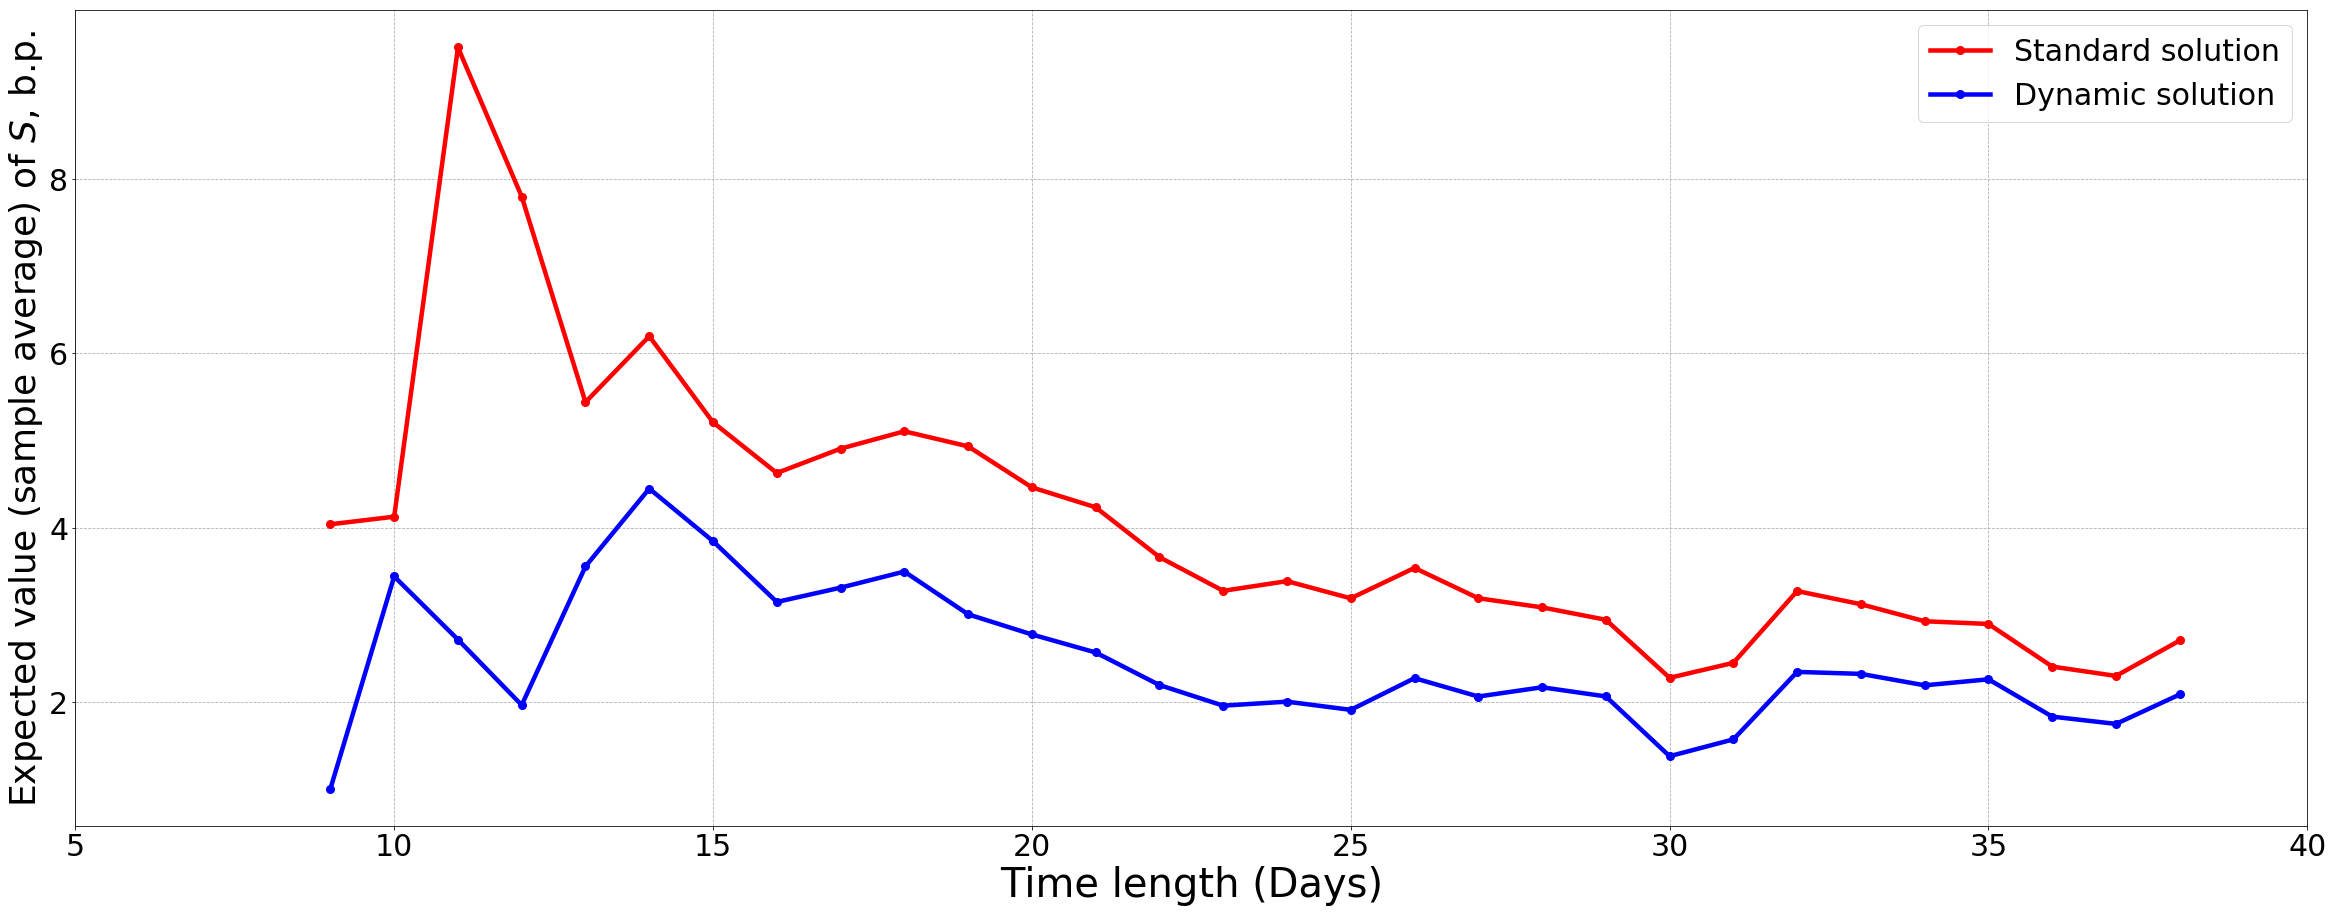

In [17]:
# redo the ordering
%pylab inline
import numpy as np
import pandas as pd
from constants import *

from volume_estimation import VolumeEstimatorStatic, VolumeEstimatorLogNormal
from volume_prediction import VolumePredictorMultiLognormal
from solution_SHDP import SHDPSolution, StaticSolution
from empirical_results import rolling_simulator, analyze_day, aggregate_results

from functions import load_data
import gzip
import cPickle as pickle
import sys

result_DF_Nasdq_100 = pd.read_csv(PROCESSEDDATAFOLDER + 'result_DF_Nasdq_100.csv')

df = pd.DataFrame({})
df['Static_mean'] = result_DF_Nasdq_100.Stilde_StaticSol[9:].expanding().mean()*1E4
df['Dynamic_mean'] = result_DF_Nasdq_100['Stilde_DynamicSol1.00e+02'][9:].expanding().mean()*1E4
print(df)


figure(figsize=(40,15))

# print result_DF_Nasdq_100.Stilde_StaticSol.expanding().mean()*1E4, result_DF_Nasdq_100['Stilde_DynamicSol1.00e+01'].expanding().mean()*1E4
# (result_DF_Nasdq_100.groupby('Day').Stilde_StaticSol.expanding().mean()*1E4).plot(label='Static', style='bo-')
# (result_DF_Nasdq_100.groupby('Day')['Stilde_DynamicSol1.00e+01'].expanding().mean()*1E4).plot(label='Dynamic', style='ro-')
plot(df['Static_mean'], 'ro-', linewidth = 4.5, markersize = 8)
plot(df['Dynamic_mean'], 'bo-', linewidth = 4.5, markersize = 8)
ylabel('Expected value (sample average) of $S$, b.p.', fontsize = 36)
xlabel('Time length (Days)', fontsize = 40)
yticks(fontsize=30)
xticks(fontsize=30)
legend(['Static solution', 'Dynamic solutions'])
xlim(5,40)
grid(linestyle='--')
legend(['Standard solution', 'Dynamic solution'], fontsize = 30)
savefig(GRAPHICSFOLDER+'time_length_on_mean_slippage.pdf', dpi=300)

# Testing time length effect on SD

Populating the interactive namespace from numpy and matplotlib
         Day  Static_SD  Dynamic_SD
0   20220503        NaN         NaN
1   20220504        NaN         NaN
2   20220505        NaN         NaN
3   20220506        NaN         NaN
4   20220509        NaN         NaN
5   20220510  31.291031   29.007147
6   20220511  25.419176   24.513607
7   20220512  21.453696   20.351602
8   20220513  19.827440   17.829377
9   20220516  18.111837   15.982575
10  20220517  16.786867   14.830583
11  20220518  17.479920   13.739741
12  20220519  16.367571   12.852750
13  20220520  15.502419   12.517636
14  20220523  14.997315   12.113358
15  20220524  14.309155   11.557440
16  20220525  13.700434   11.103179
17  20220526  13.266972   10.703945
18  20220527  12.863529   10.356397
19  20220531  12.432703   10.047727
20  20220601  12.053719    9.733998
21  20220602  11.693912    9.449122
22  20220603  11.432704    9.230076
23  20220606  11.155554    9.001931
24  20220607  10.905304    8.781177
2

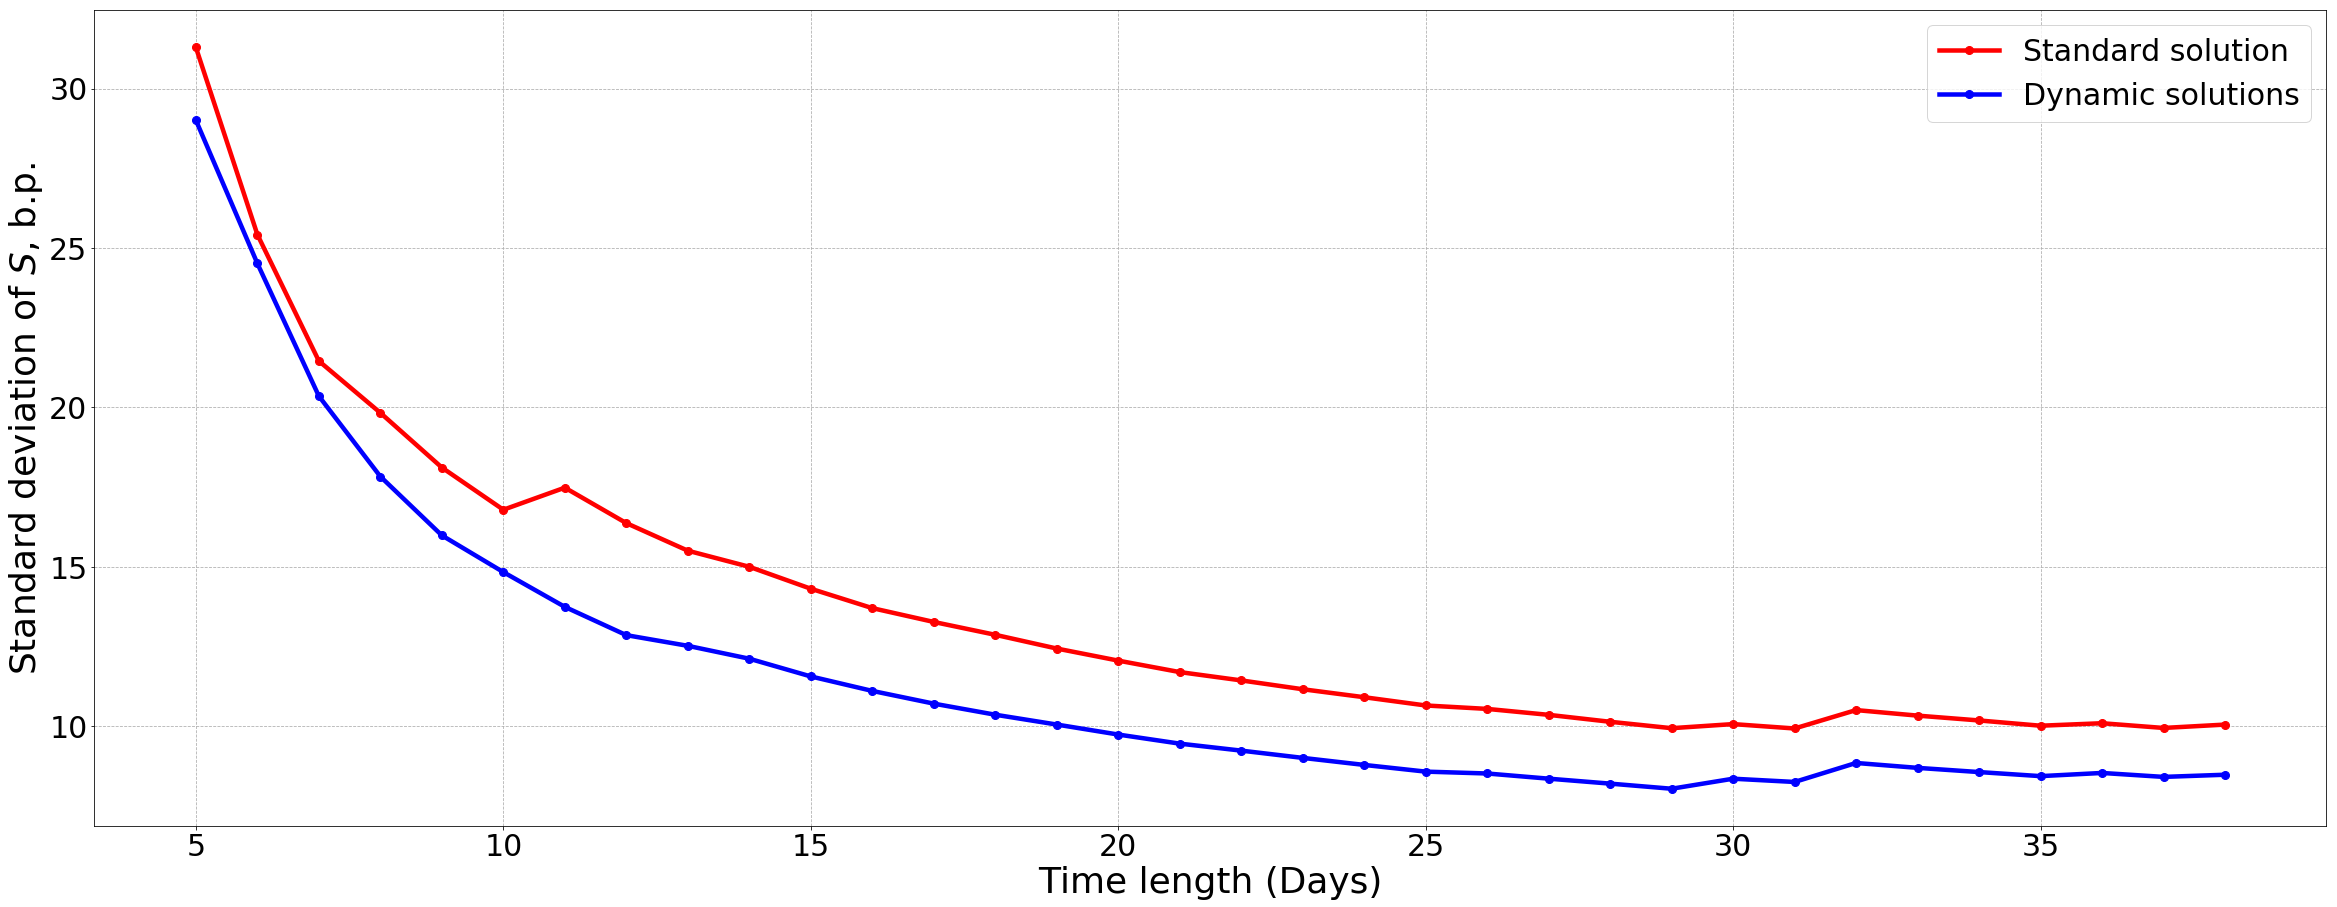

In [18]:
# redo the ordering
%pylab inline
import numpy as np
import pandas as pd
from constants import *

from volume_estimation import VolumeEstimatorStatic, VolumeEstimatorLogNormal
from volume_prediction import VolumePredictorMultiLognormal
from solution_SHDP import SHDPSolution, StaticSolution
from empirical_results import rolling_simulator, analyze_day, aggregate_results

from functions import load_data
import gzip
import cPickle as pickle
import sys

result_DF_Nasdq_100 = pd.read_csv(PROCESSEDDATAFOLDER + 'result_DF_Nasdq_100.csv')

df = pd.DataFrame({})
df['Day'] = result_DF_Nasdq_100.Day
df['Static_SD'] = result_DF_Nasdq_100.Stilde_StaticSol[4:].expanding().std()*1E4
df['Dynamic_SD'] = result_DF_Nasdq_100['Stilde_DynamicSol1.00e+02'][4:].expanding().std()*1E4
# df.loc[0] = df.loc[1]
print(df)


figure(figsize=(40,15))
# print result_DF_Nasdq_100.Stilde_StaticSol.expanding().mean()*1E4, result_DF_Nasdq_100['Stilde_DynamicSol1.00e+01'].expanding().mean()*1E4
plot(df['Static_SD'], 'ro-', linewidth = 4.5, markersize = 8)
plot(df['Dynamic_SD'], 'bo-', linewidth = 4.5, markersize = 8)
grid(linestyle='--')
yticks(fontsize=30)
xticks(fontsize=30)
ylabel('Standard deviation of $S$, b.p.', fontsize = 36)
xlabel('Time length (Days)', fontsize = 36)
legend(['Standard solution', 'Dynamic solution'], fontsize = 30)
savefig(GRAPHICSFOLDER+'time_length_on_SD_slippage.pdf', dpi=300)

In [ ]:
(2.3716-2.1316)/2.3716
